In [46]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("/content/dataALL_labeled.csv")

In [5]:
df.head() # writing first 5 rows of data

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att56,att57,att58,att59,att60,att61,att62,att63,att64,CLASS
0,0,0,11,0,16,0,0,0,4,0,...,0,0,0,0,0,3,5,0,0,SIX
1,0,0,9,16,16,16,0,0,0,0,...,0,3,0,15,13,10,3,0,16,FIVE
2,9,16,15,10,16,16,0,0,16,13,...,16,0,16,16,7,16,16,16,3,SIX
3,0,0,0,6,0,1,0,0,0,0,...,0,0,0,0,0,2,0,0,0,FIVE
4,0,5,0,14,16,0,0,0,0,0,...,0,0,3,0,9,0,8,0,0,SIX


In [6]:
df = df.sample(frac = 1) # to shuffle the pandas dataframe
df.head()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att56,att57,att58,att59,att60,att61,att62,att63,att64,CLASS
382,0,0,16,16,16,16,0,0,0,5,...,0,0,0,12,10,4,0,0,8,FIVE
356,0,0,0,0,0,0,0,0,0,0,...,0,0,0,5,0,0,0,0,0,FIVE
14,0,0,0,11,0,0,0,0,0,0,...,0,0,0,0,0,13,0,0,0,SIX
644,0,0,3,0,0,0,0,0,0,0,...,1,0,0,0,0,0,8,0,0,FIVE
514,3,3,16,9,16,11,0,0,0,0,...,0,0,0,0,16,2,3,0,2,FIVE


In [ ]:
corr = df.corr()

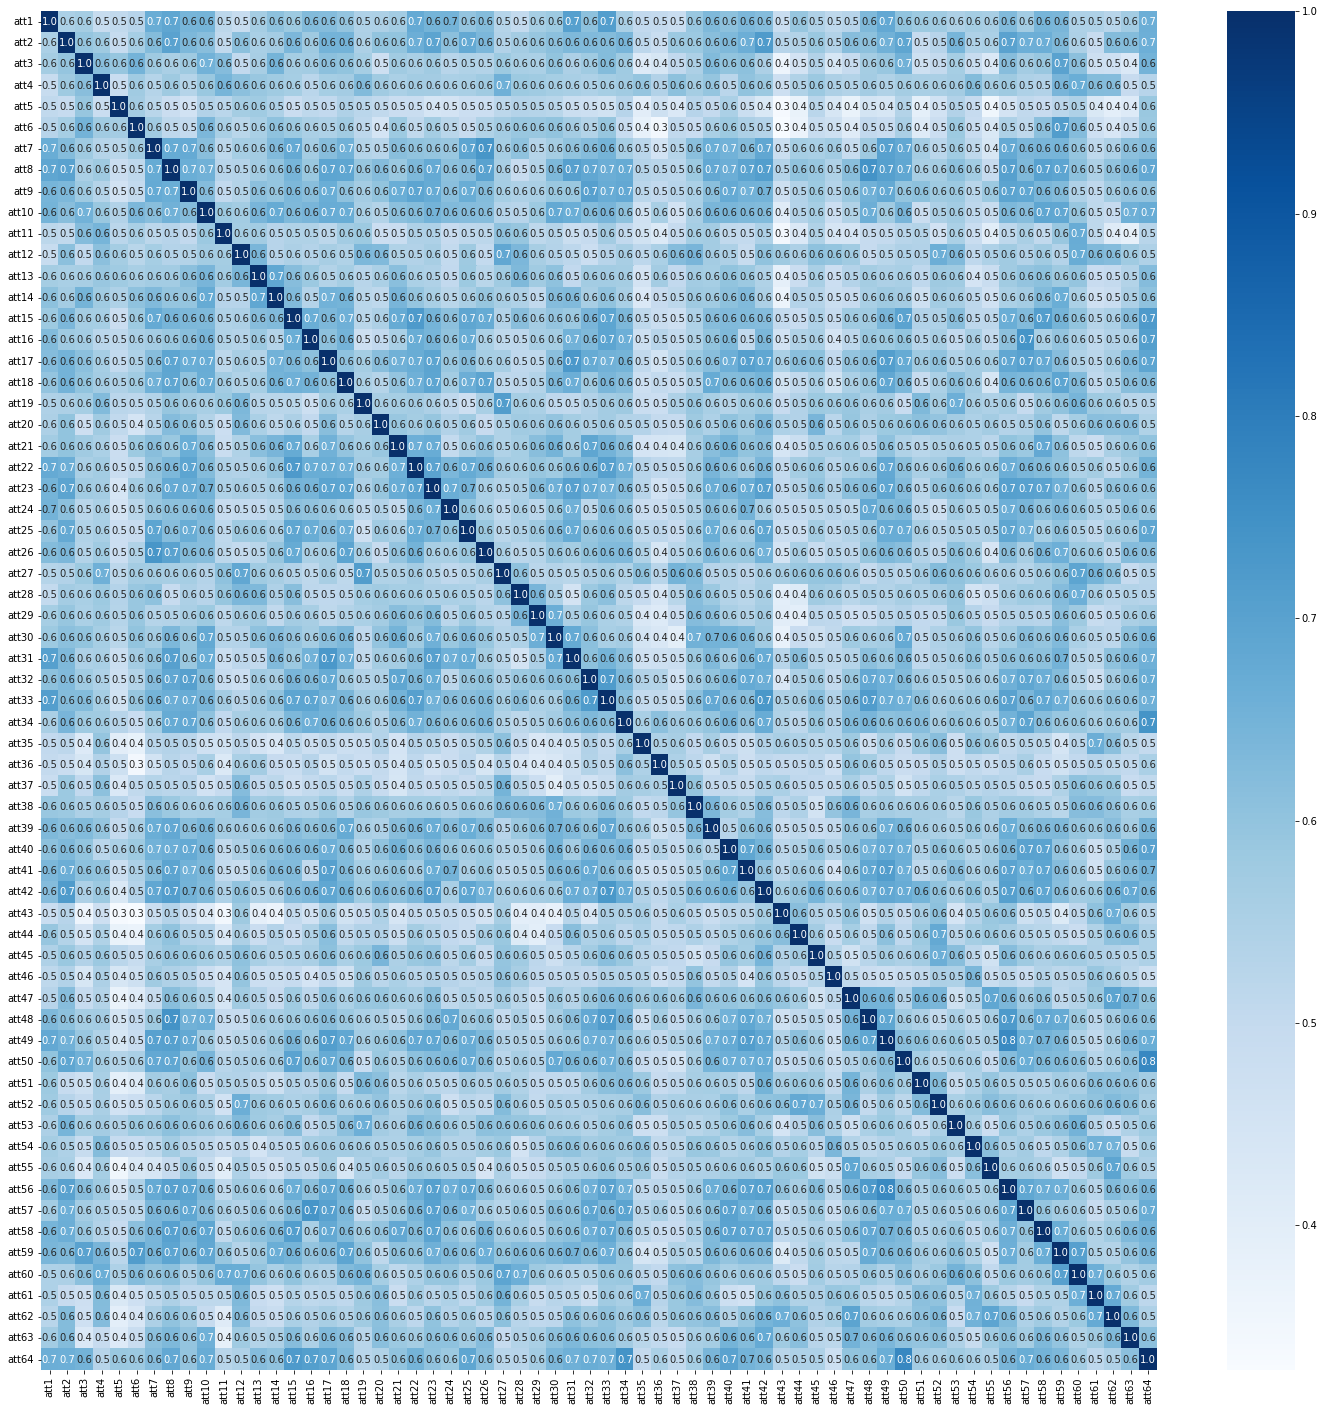

In [21]:
plt.figure(figsize=(25,25))
heatmp=sns.heatmap(corr,fmt=".1f",cmap="Blues",annot=True)
plt.show()

In [23]:
df.shape

(1110, 65)

In [22]:
x = df.drop(columns="CLASS", axis=1)
y = df["CLASS"]

In [27]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.20, random_state=42)

In [38]:
ls_f1 = []
ls_acc = []

for i in range(1,22):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  acc = accuracy_score(y_test,y_pred)
  #f1 = f1_score(y_test,y_pred)
  ls_acc.append(acc)
  #ls_f1.append(f1)

  print(" n = ",i ," accuracy : ",acc)
best_n = ls_acc.sort()

print(best_n)
#print("optimal n value is :",best_n[-1])
  

 n =  1  accuracy :  0.6891891891891891
 n =  2  accuracy :  0.6891891891891891
 n =  3  accuracy :  0.7477477477477478
 n =  4  accuracy :  0.7432432432432432
 n =  5  accuracy :  0.7927927927927928
 n =  6  accuracy :  0.7837837837837838
 n =  7  accuracy :  0.7657657657657657
 n =  8  accuracy :  0.7702702702702703
 n =  9  accuracy :  0.7702702702702703
 n =  10  accuracy :  0.7702702702702703
 n =  11  accuracy :  0.7567567567567568
 n =  12  accuracy :  0.7882882882882883
 n =  13  accuracy :  0.7702702702702703
 n =  14  accuracy :  0.7657657657657657
 n =  15  accuracy :  0.7657657657657657
 n =  16  accuracy :  0.7702702702702703
 n =  17  accuracy :  0.7747747747747747
 n =  18  accuracy :  0.7927927927927928
 n =  19  accuracy :  0.8018018018018018
 n =  20  accuracy :  0.8108108108108109
 n =  21  accuracy :  0.8018018018018018
None


In [40]:

model_knn = KNeighborsClassifier(20)
model_dt = DecisionTreeClassifier()
model_rf = RandomForestClassifier()
model_svm = SVC(C=3)
model_lg = LogisticRegression()

In [41]:
model_knn.fit(x_train,y_train)
model_dt.fit(x_train,y_train)
model_rf.fit(x_train,y_train)
model_svm.fit(x_train,y_train)
model_lg.fit(x_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
y_pred_knn = model_knn.predict(x_test)
y_pred_dt = model_dt.predict(x_test)
y_pred_rf = model_rf.predict(x_test)
y_pred_svm = model_svm.predict(x_test)
y_pred_lg = model_lg.predict(x_test)

In [43]:
print("KNN accuracy : ",accuracy_score(y_test,y_pred_knn))
print("dt accuracy : ",accuracy_score(y_test,y_pred_dt))
print("rf accuracy : ",accuracy_score(y_test,y_pred_rf))
print("svm accuracy : ",accuracy_score(y_test,y_pred_svm))
print("lg accuracy : ",accuracy_score(y_test,y_pred_lg))

KNN accuracy :  0.8108108108108109
dt accuracy :  0.7387387387387387
rf accuracy :  0.8558558558558559
svm accuracy :  0.8468468468468469
lg accuracy :  0.8153153153153153


In [47]:
print("KNN accuracy : ",classification_report(y_test,y_pred_knn))
print("dt accuracy : ",classification_report(y_test,y_pred_dt))
print("rf accuracy : ",classification_report(y_test,y_pred_rf))
print("svm accuracy : ",classification_report(y_test,y_pred_svm))
print("lg accuracy : ",classification_report(y_test,y_pred_lg))

KNN accuracy :                precision    recall  f1-score   support

        FIVE       0.80      0.81      0.81       108
         SIX       0.82      0.81      0.81       114

    accuracy                           0.81       222
   macro avg       0.81      0.81      0.81       222
weighted avg       0.81      0.81      0.81       222

dt accuracy :                precision    recall  f1-score   support

        FIVE       0.73      0.73      0.73       108
         SIX       0.75      0.75      0.75       114

    accuracy                           0.74       222
   macro avg       0.74      0.74      0.74       222
weighted avg       0.74      0.74      0.74       222

rf accuracy :                precision    recall  f1-score   support

        FIVE       0.86      0.84      0.85       108
         SIX       0.85      0.87      0.86       114

    accuracy                           0.86       222
   macro avg       0.86      0.86      0.86       222
weighted avg       0.86     